Enter the Stock Nameyesbank.ns
The Realtime details of the yesbank.ns is given below 
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


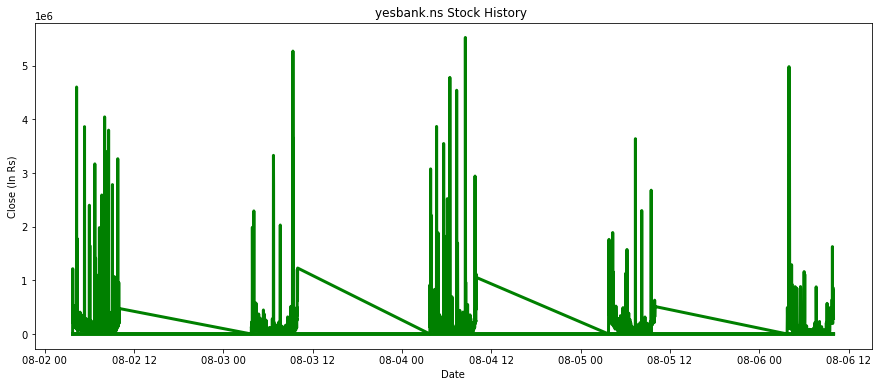

The min price is 12.300000 
The max price is 12.900000 
Enter the choice:
1)Basic details of the stock 
2)Minimum price 
3)Maximum price  
4)Real Time data 
5)Other Details 
6)Predict5
Enter your choice 1)Splits 
2)Financials 
3)Major Share Holders 
4)Balance Sheet 
5)Earnings 
6)Analysts Recomondations1
Date
2017-09-21    5.0
Name: Stock Splits, dtype: float64
Enter the choice:
1)Basic details of the stock 
2)Minimum price 
3)Maximum price  
4)Real Time data 
5)Other Details 
6)Predict5
Enter your choice 1)Splits 
2)Financials 
3)Major Share Holders 
4)Balance Sheet 
5)Earnings 
6)Analysts Recomondations2
                                           2021-03-31      2020-03-31  \
Research Development                             None            None   
Effect Of Accounting Charges                     None            None   
Income Before Tax                      -47617752000.0 -208381933000.0   
Minority Interest                                None            None   
Net Income           

Enter the choice:
1)Basic details of the stock 
2)Minimum price 
3)Maximum price  
4)Real Time data 
5)Other Details 
6)Predict5
Enter your choice 1)Splits 
2)Financials 
3)Major Share Holders 
4)Balance Sheet 
5)Earnings 
6)Analysts Recomondations6
None


In [ ]:
import pandas as pd
import numpy as np
from nsepy import get_history, get_index_pe_history
from datetime import date
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


def findDay(date):
    day = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return (calendar.day_name[day])


class stock:
    def __init__(self, ticker):
        self.ticker = ticker
        self.data = yf.download(tickers=self.ticker)  # to download real time data
        self.data = self.data.reset_index(level=0)
        self.start_date = min(self.data['Date'])  # ipo start date
        self.end_date = max(self.data['Date'])  # public for today

    def basic_details(self):
        plt.plot(self.data['Date'], self.data['Close'], color='green', linewidth=3)
        plt.xlabel('Date')
        plt.ylabel('Close (In Rs)')
        plt.title("%s Stock History " % self.ticker)
        plt.show()
        print("The min price is %f " % min(self.data['Low']))
        print("The max price is %f " % max(self.data['High']))

    def min_price(self):
        print("\n The min price is %f " % min(self.data['Low']))

    def max_price(self):
        print("\n The max price is %f " % max(self.data['High']))


    def realtime_details(self, period='5d'):
        data = yf.download(tickers=self.ticker, period=period, interval='1m')
        plt.style.context(['ggplot'])
        plt.figure(figsize=(15, 6))
        plt.plot(data, color='green', linewidth=3)
        plt.xlabel('Date')
        plt.ylabel('Close (In Rs)')
        plt.title("%s Stock History " % self.ticker)
        plt.show()
        print("The min price is %f " % min(data['Low']))
        print("The max price is %f " % max(data['High']))

    def other_details(self):
        data = yf.Ticker(self.ticker)
        choice = int(input(
            "Enter your choice 1)Splits \n2)Financials \n3)Major Share Holders \n4)Balance Sheet \n5)Earnings \n6)Analysts Recomondations"))
        if choice == 1:
            print(data.splits)  # SHARES
        elif choice == 2:
            print(data.financials)  # NO.of shares
        elif choice == 3:
            print(data.major_holders)  # the one who brought the maximum shares on a perticular stock
        elif choice == 4:
            print(data.balance_sheet)  # analysing the stock shares profits n loss details,spend details
        elif choice == 5:
            print(data.earnings)
        elif choice == 6:
            print(data.recommendations)

    def predict(self, days):
        data_copy = self.data[["Adj Close"]]
        data_copy['Prediction'] = data_copy[['Adj Close']].shift(-days)
        num = len(data_copy['Prediction'])
        data_copy = data_copy.reset_index(level=0)
        x = np.array(data_copy.drop(['Prediction'], 1))
        x = x[:num - 30]
        y = np.array(data_copy['Prediction'])
        y = y[:num - 30]
        
        main_data1 = pd.DataFrame()
        a = []
        b = []
        print(y)
        for i in x:
            a.append(i[0])
            b.append(i[1])
        main_data1['1'] = a
        main_data1['2'] = b
        main_data1['3'] = y
        main_data1.to_csv('C:/Users/akash/Downloads/main_data.csv')
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # SVR Model
        svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
        svr_rbf.fit(x_train, y_train)
        svm_confidence = svr_rbf.score(x_test, y_test)
        
        # Lr model
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        lr_confidence = lr.score(x_test, y_test)
        x_forecast = np.array(data_copy.drop(['Prediction'], 1))[-days:]
        # Lr prediction
        lr_prediction = lr.predict(x_forecast)
        # Svm prediction
        svm_prediction = svr_rbf.predict(x_forecast)
        # Getting the dates for prediction
        Nextdate = []
        days_copy = days
        i = 0
        while days_copy != 0:
            i += 1
            NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=i)
            N = NextDay_Date.strftime('%d %m %Y')
            day = findDay(N)
            if day == 'Saturday' or day == 'Sunday':
                pass
            else:
                days_copy -= 1
                Nextdate.append(NextDay_Date.strftime('%d-%b-%Y'))
        if lr_confidence > svm_confidence:
            predicted_data = pd.DataFrame(lr_prediction, Nextdate)
            confidence = str(lr_confidence * 100)
        else:
            predicted_data = pd.DataFrame(svm_prediction, Nextdate)
            confidence = str(svm_confidence * 100)
        print("The prediction data for next " + str(days) + " is given in the below table")
        print(predicted_data)
        print("The data provided in the above table is " + confidence + " percent accurate")
        plt.style.context(['ggplot'])
        plt.figure(figsize=(15, 6))
        plt.plot(predicted_data)
        plt.xlabel('Date')
        plt.ylabel('Predicted Amount')
        plt.title("%s Stock Analytics " % self.ticker)
        plt.show()
        
        
ticker = input("Enter the Stock Name")
print("The Realtime details of the " + ticker + " is given below ")
stock_details = stock(ticker)
stock_details.realtime_details()
choice = int(input(
    "Enter the choice:\n1)Basic details of the stock \n2)Minimum price \n3)Maximum price  \n4)Real Time data \n5)Other Details \n6)Predict"))

while choice > 0 and choice <= 7:
    if choice == 1:
        stock_details.basic_details()
    elif choice == 2:
        stock_details.min_price()
    elif choice == 3: 
        stock_details.max_price()
    elif choice == 4:
        stock_details.realtime_details()
    elif choice == 5:
        stock_details.other_details()
    elif choice == 6:
        days = int(input("Enter the number of days"))

        stock_details.predict(days)

    choice = int(input(
        "Enter the choice:\n1)Basic details of the stock \n2)Minimum price \n3)Maximum price  \n4)Real Time data \n5)Other Details \n6)Predict"))

